In [2]:
import tensorflow as tf
import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

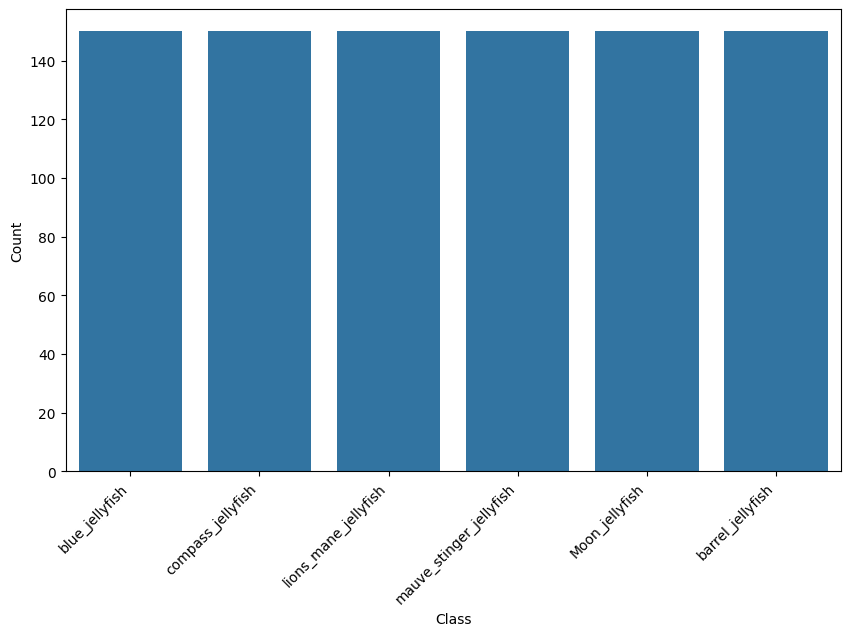

In [3]:
def load_data(data_directory):
    images = []
    labels = []
    classes = []
    label_encoder = LabelEncoder()

    for class_name in os.listdir(data_directory):
        class_path = os.path.join(data_directory, class_name)
        classes.append(class_name)

        for filename in os.listdir(class_path):
            filepath = os.path.join(class_path, filename)
            img = cv2.imread(filepath)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                img = cv2.resize(img, (224, 224))
                img = img / 255.0
                images.append(img)
                labels.append(class_name)

    images = np.array(images)
    labels = label_encoder.fit_transform(labels) 

    return images, labels, classes

# Update the path to your dataset
data_directory = './jellyfish_data'
images, labels, classes = load_data(data_directory)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=[classes[label] for label in labels])  
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
classes = np.unique(classes)

In [9]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(6, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
datagen = ImageDataGenerator(
    rotation_range=30,         # Randomly rotate images by 20 degrees
    #brightness_range=[0., 0.5],  # Adjust brightness between 10% and 200%
    width_shift_range=0.1,     # Randomly shift images horizontally by 20% of the width
    height_shift_range=0.1,    # Randomly shift images vertically by 20% of the height
    shear_range=0.1,           # Shear intensity
    zoom_range=0.3,            # Randomly zoom into images
    horizontal_flip=True,      # Randomly flip images horizontally
    vertical_flip=True,        # Randomly flip images vertically
)
datagen1 = ImageDataGenerator()

train_generator = datagen.flow(X_train, y_train, batch_size=20)
val_generator = datagen1.flow(X_test, y_test, batch_size=20)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 224, 224, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 224, 224, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,718,150 (98.11 MB)

 Trainable params: 25,718,150 (98.11 MB)

 Non-trainable params: 0 (0.00 B)

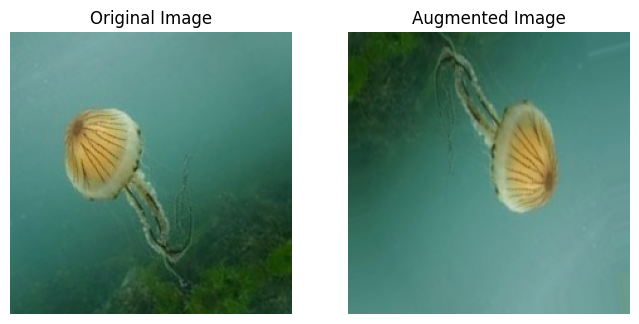

In [12]:
index = np.random.randint(0, len(X_train))

# Select the original image
original_image = (X_train[index] * 255).astype(np.uint8)

# Reshape the selected image to (1, height, width, channels) to make it a batch of size 1
original_image = np.expand_dims(original_image, axis=0)

# Create an iterator for the batch (with only one sample)
iterator = datagen.flow(original_image, batch_size=1)

# Generate augmented images
augmented_images = next(iterator).astype(np.uint8)

# Display the original and augmented images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image[0])
plt.axis('off')

# Augmented image
plt.subplot(1, 2, 2)
plt.title('Augmented Image')
plt.imshow(augmented_images[0])  # vmax, vmin 제거
plt.axis('off')

plt.show()


In [13]:
history = model.fit(train_generator, epochs=100, validation_data=val_generator)

c:\Users\envym\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 31s 817ms/step - accuracy: 0.1547 - loss: 2.6004 - val_accuracy: 0.2167 - val_loss: 1.7749
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 29s 797ms/step - accuracy: 0.2632 - loss: 1.6693 - val_accuracy: 0.4111 - val_loss: 1.4879
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 28s 771ms/step - accuracy: 0.4567 - loss: 1.3498 - val_accuracy: 0.4611 - val_loss: 1.3628
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 27s 760ms/step - accuracy: 0.5147 - loss: 1.2202 - val_accuracy: 0.4333 - val_loss: 1.3469
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 28s 771ms/step - accuracy: 0.4275 - loss: 1.3360 - val_accuracy: 0.4778 - val_loss: 1.3522
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 28s 785ms/step - accuracy: 0.5119 - loss: 1.2300 - val_accuracy: 0.5333 - val_loss: 1.3293
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 30s 821ms/step - accuracy: 0.5476 - loss: 1.2145 - val_accuracy: 0.4833 - val_loss: 1.2477
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 29s 811ms/step - accuracy: 0.5682 - loss: 1.1292 - 

In [15]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Find the epoch with the highest validation accuracy
best_epoch = val_accuracy.index(max(val_accuracy)) + 1  # Add 1 because epochs are 1-indexed

print(f"Best Accuracy: {accuracy[best_epoch-1]:.4f} at Epoch {best_epoch}")
print(f"Best Validation Accuracy: {val_accuracy[best_epoch-1]:.4f} at Epoch {best_epoch}")

Best Accuracy: 0.9375 at Epoch 100
Best Validation Accuracy: 0.9000 at Epoch 100


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step


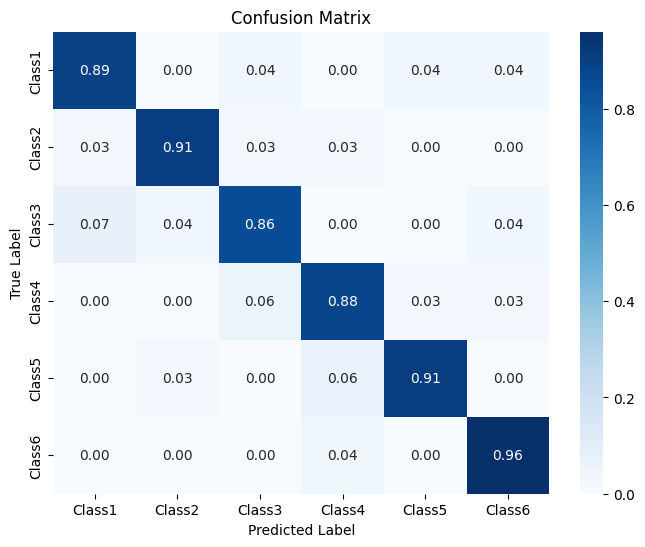

In [17]:
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred_labels)

# Calculate class weights to account for imbalanced classes (optional)
weights = class_weight.compute_sample_weight('balanced', y_true)

# Normalize the confusion matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Get class names from your data
classes = ["Class1", "Class2", "Class3", "Class4", "Class5", "Class6"]  # Replace with your actual class names

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

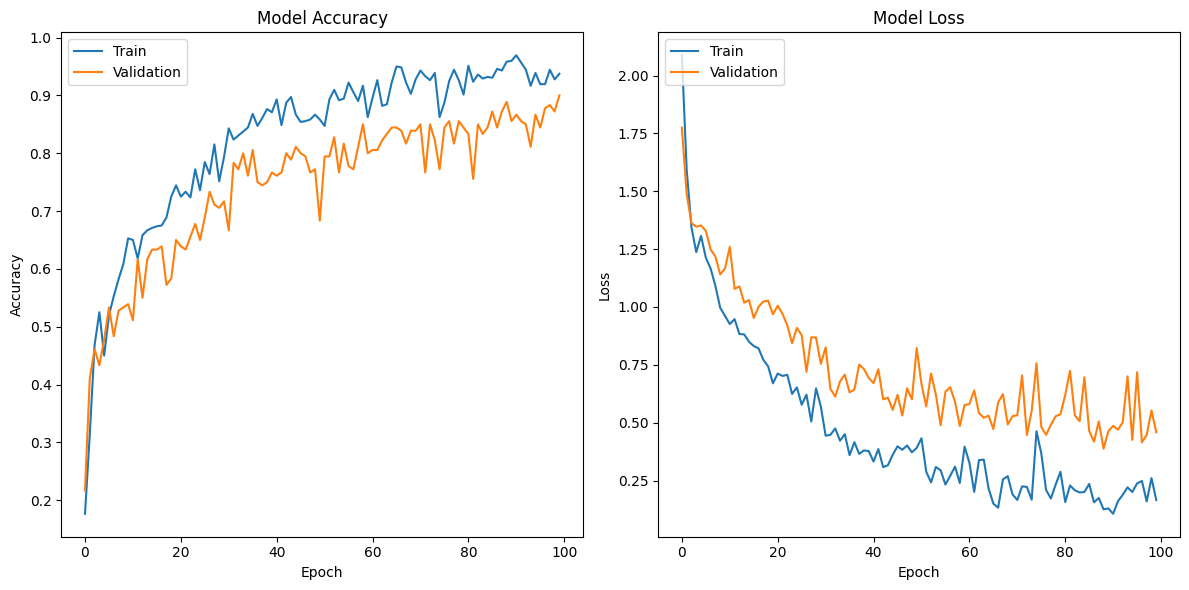

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()